In [1]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import matplotlib.pylab as plt

# NNT
Data -> Humans' Effort(SIFT,HOG,..) -> **MachineTraining(SVM,KNN,..)** -> Output\
Data -> **Neural Network(Deep Learning)** -> Output\

Deep Learning need _training data_ , _test data_

## Standard index
### lose function(cost function)
MSE (Mean Squared Error)

$
E = \displaystyle\frac{1}{2}\sum_{k}(y_k-t_k)^2
$

$y_k$ Output of NN\
$t_k$ Answer label\
$k$ Dimension of Data

In [2]:
def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

In [3]:
# If num 
# t: answer is `2`
t = [0,0,1,0,0,0,0,0]
# y: estimate `2` is answer (0.6)
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.0]
print(mean_squared_error(np.array(y),np.array(t)))

# y: estimate `7` is answer (0.6)
y = [0.1,0.05,0.1,0.0,0.05,0.6,0.0,0.0]
print(mean_squared_error(np.array(y),np.array(t)))

0.09250000000000003
0.5925


CEE (Cross Entropy Error)

$
E = -\displaystyle\sum_{k}t_k\log{y_k}
$

$y_k$ Output of NN\
$t_k$ Answer label (One-hot encoding)\
$k$ Dimension of Data

In [4]:
def cross_entropy_error(y,t):
    # use delta cause log0 = -inf
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [5]:
# t: answer is `2`
t = [0,0,1,0,0,0,0,0]
# y: estimate `2` is answer (0.6)
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

# y: estimate `7` is answer (0.6)
y = [0.1,0.05,0.1,0.0,0.05,0.6,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

0.510825457099338
2.302584092994546


### Minibatch Learning

Due to ineffciency in checking all lost functions, it's recommended to randomly choose some ipt data, and  calculate lose functions of them.

$
E = \displaystyle-\frac{1}{N}\sum_{n}\sum_{k}t_{nk}\log{y_{nk}}
$



In [6]:
(x_train,t_train), (x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size) # 0<{NUM}<train_size, len({NUM})=batch_size
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [7]:
# CEE (for batch)
def cross_entropy_errorB(y,t):
    # y: NN opt, t: one-hot-label
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

In [8]:
# batch CEE when t isn't one-hot-encoded
def cross_entropy_errorB_nonOneHot(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

In [9]:
testTemp = np.arange(0,20)
# testTemp.ndim == 1
testTemp = testTemp.reshape(2,10)
testTemp.ndim

2

### Calculus

reason why we use lost functions is to fit error with calculus.\
when we use formal stair-shape function, slope will be either 0 or inf.

In [10]:
def numerical_diff(f,x):
    h = 1e-4 # known to fit well
    return (f(x+h)-f(x-h))/(2*h)

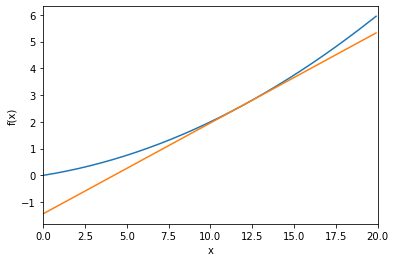

In [16]:
def fn_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0,20.0,0.1)
y = fn_1(x)

plt.xlim(0,20)
plt.xlabel("x"); plt.ylabel("f(x)")
plt.plot(x,y)
plt.plot(x,numerical_diff(fn_1,12)*(x-12)+fn_1(12)) 
plt.show()

**Gradient**

$
\displaystyle(\frac{\partial{f}}{x_0},\frac{\partial{f}}{x_1},\dots)
$

In [17]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zero_like(x) # has same shape as x
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val+h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1-fxh2) / (2*h)
        x[idx] = tmp_val # restore value
    return grad